# Semianr 7 - Applied Quantitative Logistics

In [68]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random


## Traveling Salesman Problem

In [69]:
# list(np.random.permutation(15))

In [70]:
# list(np.random.randint(0, 100, 15))

In [71]:
# list(np.random.randint(0, 100, 15))

In [72]:
def tsp():
    
    x = [24, 74, 83, 53, 7, 96, 10, 33, 53, 92, 13, 35, 97, 90, 97]
    y = [77, 91, 60, 4, 93, 18, 18, 20, 89, 79, 62, 32, 65, 11, 62]
    
    n = len(x)
    
    d = np.zeros([n, n])
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            d[i][j] = math.sqrt((x[i] - x[j])**2 + (y[i]-y[j])**2)
            d[j][i] = d[i][j]
            
    xmin = 0
    xmax = 100
    
    ymin = 0
    ymax = 100
    
    model = {'n': n,
            'x': x,
            'y': y,
            'd': d,
            'xmin': xmin,
            'xmax': xmax,
            'ymin': ymin,
            'ymax': ymax}
        
    return model

In [73]:
model = tsp()

### Create Random Solution

In [74]:
def createRandomSolution(model):
    n = model['n']
    sol = list(np.random.permutation(n))
    return sol

In [75]:
# sol = createRandomSolution(model)
# sol

### Calculating the Length - Cost Function

In [76]:
def TourLength(tour, model):
    n = model['n']

    tour.append(tour[0])

    L = 0

    for k in range(0, n):
        i = tour[k]
        j = tour[k+1]

        L = L + model['d'][i][j]

    if L == 0:
        return 1e9
    else:
        return L


### Roulette Wheele Selection

In [77]:
def rouletteWheelSelection(p):
    r = random.random()
    
    c = np.cumsum(p)
    
    indexes = [
        index for index in range(len(c))
        if c[index] > r
    ]
    
    return indexes[0]

# HW4 - Applied Quantitative Logistics

Implement 3 Mutation methods which we discussed during the seminar for problems with permutation:

1) Swap Mutation

2) Reversion Mutation

3) Insertion (Removing and inserting in a new place)

4) Create a function for selecting each mutation randomly by the roulette wheel approach

5) Use a Genetic Algorithm to solve this problem (For simplicity just put the probability of crossover equal to 0 - which means we don't use crossover)

6) Print all best costs with iterations and plot the result based on iteration (Not NFE)


Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **April 13, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW4_AQL]-YOUR_NAME**

### Mutation

In [78]:
def swapMutation(sol):
    i = random.randint(0, len(sol) - 1)
    j = random.randint(0, len(sol) - 1)
    sol[i], sol[j] = sol[j], sol[i]
    return sol


In [79]:
def reversionMutation(sol):
    i = random.randint(0, len(sol) - 1)
    j = random.randint(0, len(sol) - 1)
    if i > j:
        i, j = j, i
    sol[i:j+1] = sol[i:j+1][::-1]
    return sol




In [80]:
def insertionMutation(sol):
    i = random.randint(0, len(sol) - 1)
    j = random.randint(0, len(sol) - 1)
    if i != j:
        if i > j:
            i, j = j, i
        c = sol.pop(i)
        sol.insert(j, c)
    return sol

## Genetic Algorithm (GA)

In [81]:
popSize = 50
numGenerations = 100

def geneticAlgorithm(model, popSize, numGenerations):
    
    population = []
    
    for i in range(0, popSize):
        solution = createRandomSolution(model)
        population.append(solution)
    
    bestCost = float('inf')
    bestSolution = []
    costs = []
    
    for gen in range(numGenerations):
        
        newPopulation = []
        populationFitness = [TourLength(sol, model) + 1e-6 for sol in population]
        
        for i in range(0, popSize):
            
            parent_index = rouletteWheelSelection(populationFitness)
            parent = population[parent_index]
            child = list(parent)

            
            # apply mutation
            mutationMethod = rouletteWheelSelection([0.33, 0.33, 0.34])
            
            if mutationMethod == 0:
                child = swapMutation(child)
            elif mutationMethod == 1:
                child = reversionMutation(child)
            else:
                child = insertionMutation(child)
            
            newPopulation.append(child)
            populationFitness.append(1 / TourLength(child, model))
            
            # update best cost and solution
            cost = TourLength(child, model)
            if cost < bestCost:
                bestCost = cost
                bestSolution = child
            
        population = newPopulation
        
        costs.append(bestCost)
    
    return costs, bestSolution

model = tsp()

bestCost, bestSolution = geneticAlgorithm(model, popSize, numGenerations)


for gen in range(numGenerations):
    print(f"Iteration {gen+1}: Best cost = {bestCost[gen]}")


Iteration 1: Best cost = 656.7985641371409
Iteration 2: Best cost = 602.3871363977016
Iteration 3: Best cost = 500.57367494331544
Iteration 4: Best cost = 467.57217328514616
Iteration 5: Best cost = 467.57217328514616
Iteration 6: Best cost = 396.6465412674127
Iteration 7: Best cost = 269.587499873264
Iteration 8: Best cost = 269.587499873264
Iteration 9: Best cost = 269.587499873264
Iteration 10: Best cost = 195.46795039929785
Iteration 11: Best cost = 195.46795039929785
Iteration 12: Best cost = 195.46795039929785
Iteration 13: Best cost = 158.44794795766555
Iteration 14: Best cost = 158.44794795766555
Iteration 15: Best cost = 134.83262746824272
Iteration 16: Best cost = 84.21995013059554
Iteration 17: Best cost = 42.04759208325728
Iteration 18: Best cost = 29.732137494637012
Iteration 19: Best cost = 29.732137494637012
Iteration 20: Best cost = 14.866068747318506
Iteration 21: Best cost = 14.866068747318506
Iteration 22: Best cost = 14.866068747318506
Iteration 23: Best cost = 14.8

### Results

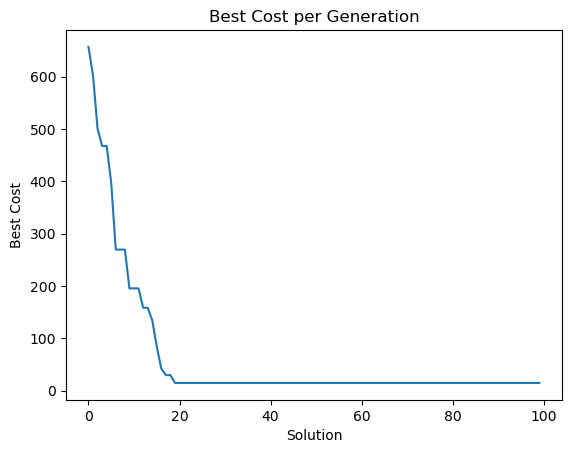

In [82]:
# plot results
plt.plot(bestCost)
plt.title('Best Cost per Generation')
plt.xlabel('Solution')
plt.ylabel('Best Cost')
plt.show()
